In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures



import pandas as pd 
import matplotlib.pyplot as plt


In [7]:
data_cleaned = pd.read_csv('data_cleaned.csv')
data_cleaned

,age,sex,bmi,children,smoker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest,categorie_imc
0,19,0,27.900,0,1,southwest,16884.92400,0,0,0,1,surpoids
1,18,1,33.770,1,0,southeast,1725.55230,0,0,1,0,obésité modérée
2,28,1,33.000,3,0,southeast,4449.46200,0,0,1,0,obésité modérée
3,33,1,22.705,0,0,northwest,21984.47061,0,1,0,0,poids normal
4,32,1,28.880,0,0,northwest,3866.85520,0,1,0,0,surpoids
...,...,...,...,...,...,...,...,...,...,...,...,...
1332,50,1,30.970,3,0,northwest,10600.54830,0,1,0,0,obésité modérée
1333,18,0,31.920,0,0,northeast,2205.98080,1,0,0,0,obésité modérée
1334,18,0,36.850,0,0,southeast,1629.83350,0,0,1,0,obésité sévère
1335,21,0,25.800,0,0,southwest,2007.94500,0,0,0,1,surpoids


In [8]:
model = LinearRegression()
y = data_cleaned["charges"]
X = data_cleaned[["age", "bmi", "smoker"]]


In [9]:
model = LinearRegression()
model.fit(X, y)
model.score(X, y)
model.predict(X )

array([26081.23773727,  3890.20936207,  6236.75357246, ...,
        4883.64691596,  2097.99949871, 37357.21010511], shape=(1337,))

In [10]:
data_cleaned = data_cleaned[["age", "bmi", "smoker","charges"]]
data_cleaned.head()


,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [11]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1332    10600.54830
1333     2205.98080
1334     1629.83350
1335     2007.94500
1336    29141.36030
Name: charges, Length: 1337, dtype: float64

In [12]:
X

,age,bmi,smoker
0,19,27.900,1
1,18,33.770,0
2,28,33.000,0
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1332,50,30.970,0
1333,18,31.920,0
1334,18,36.850,0
1335,21,25.800,0


In [13]:
model.fit(X, y)
model.score(X, y)

0.7474591912597185

division du data set en train set/ test set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

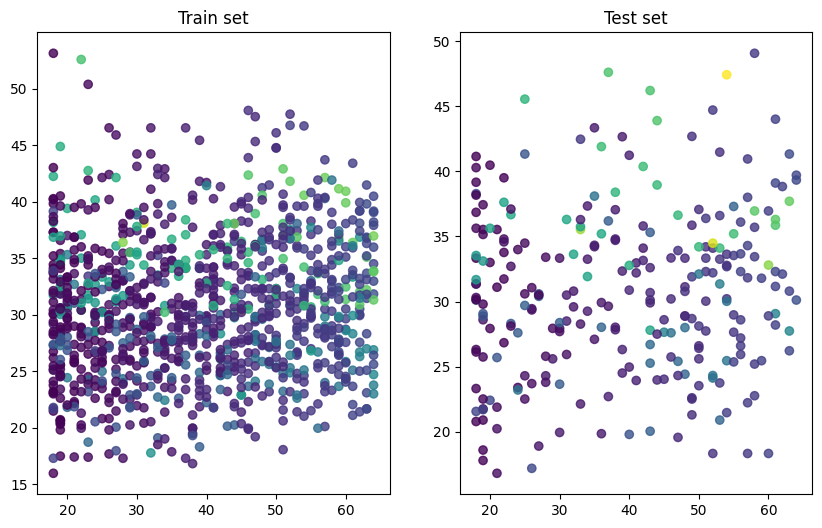

In [15]:



X_train = X_train.values
X_test = X_test.values

plt.figure(figsize=(10, 6))

# training set
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title("Train set")

#  test set
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)
plt.title("Test set")

plt.show()


In [16]:
model = LinearRegression()  

model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7403733216303106
0.7693099213707556


/home/flavigny/Documents/DEV_IA/assurance/Projet_assurance/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


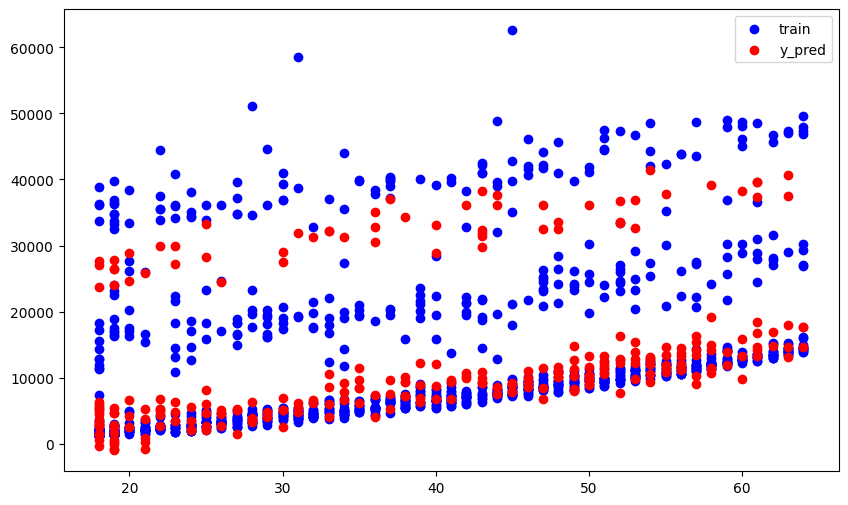

In [18]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], y_train, color='blue', label='train')
plt.scatter(X_test[:, 0], y_pred, color='red', label='y_pred')
plt.legend()

/home/flavigny/Documents/DEV_IA/assurance/Projet_assurance/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


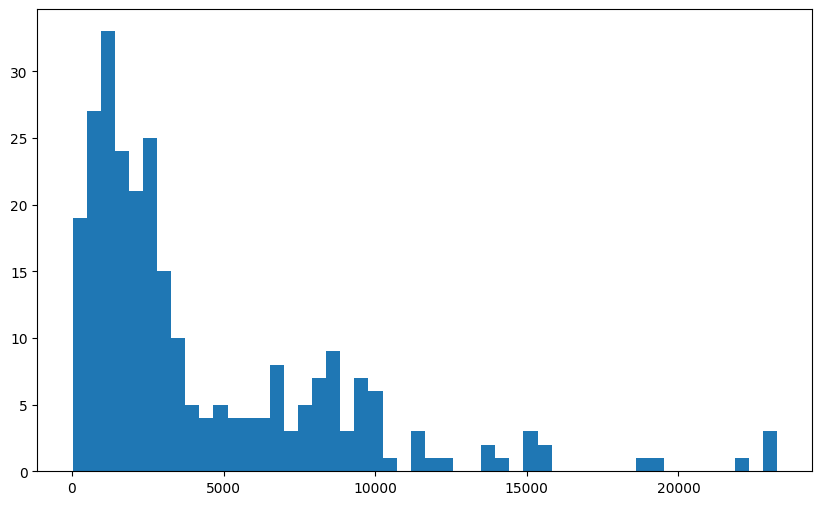

In [21]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))

erreur_histo = np.abs(y_test - y_pred)
plt.hist(erreur_histo, bins=50)
plt.show()

In [31]:
cross_val_score(model, X_train, y_train, cv=5, scoring="r2")

array([0.72785098, 0.75770367, 0.72156698, 0.74580693, 0.72950867])

In [32]:
cross_val_score(model, X_train, y_train, cv=5, scoring="r2").mean()

np.float64(0.736487444672524)

In [19]:
from sklearn.model_selection import validation_curve                                                                                                                             

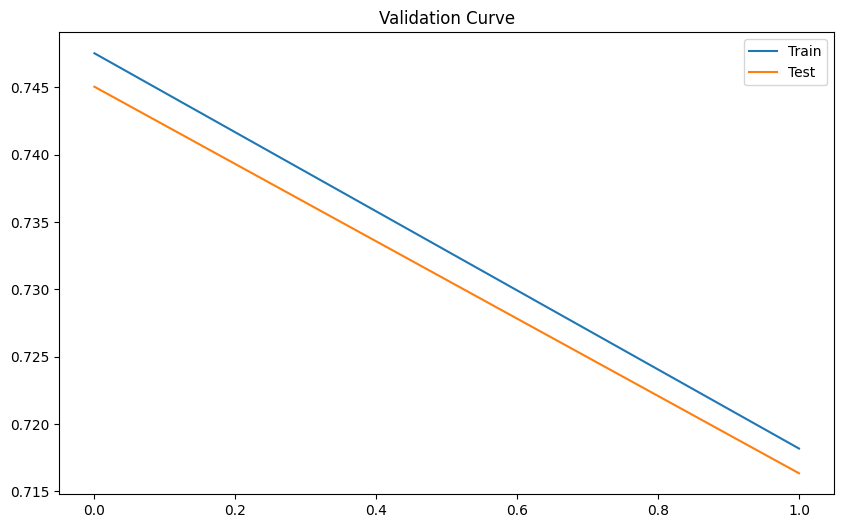

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)
train_scores, test_scores = validation_curve(model, X, y, param_name="fit_intercept", param_range=[True, False], cv=5)



plt.figure(figsize=(10, 6))
plt.plot(train_scores.mean(axis=1), label="Train")
plt.plot(test_scores.mean(axis=1), label="Test")
plt.title("Validation Curve")
plt.legend()


In [42]:
#confusion_matrix(y_test, model.predict(X_test))

Learning curve

In [45]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
print(N)

[ 85 171 256 342 427 513 598 684 769 855]


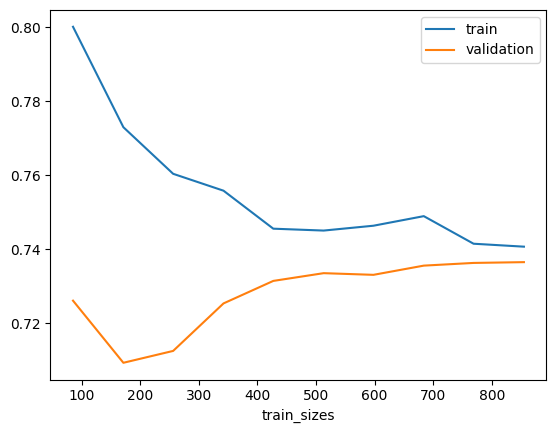

In [47]:
plt.plot(N, train_score.mean(axis=1), label="train")
plt.plot(N, val_score.mean(axis=1), label="validation")
plt.xlabel("train_sizes")
plt.legend()

Normalisation des données du dataframe

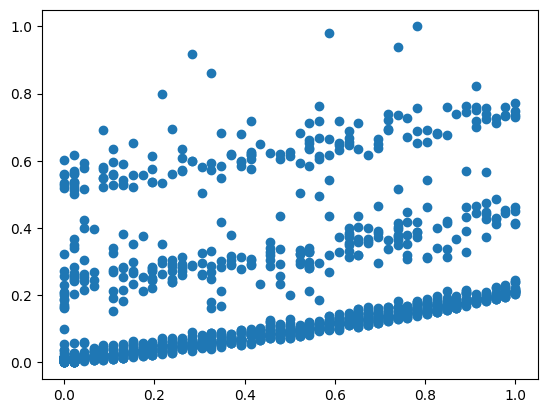

In [38]:
scaler = MinMaxScaler()
y_rescaled = y.to_numpy().reshape(-1, 1)
y_minmax = scaler.fit_transform(y_rescaled)

X_minmax = scaler.fit_transform(X)



plt.scatter(X_minmax[:,0], y_minmax)

plt.show()